# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.append('/home/chayan/NeuroMDAVIS/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utills import Datasets as ds
from utills import NeuroMDAVIS_TestSamples as nd

# Loading Data

In [2]:
x1, x2, y = ds.LoadData('pbmc10k_atacseq')
x1 = x1.T
x2 = x2.T

In [3]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1, x2, y, test_size=0.4, random_state=42)

# Applying NeuroMDAVIS

In [4]:
neuromdavis, low = nd.NeuroMDAVIS([x1_train, x2_train], dim=2, lambda_act= 0.0001, lambda_weight= 0.0001,
                                  num_neuron=[32, [128, 128]], bs=128, epoch=100, sd=0, verbose=1)
X_embedding_train = low.predict(np.eye(x1_train.shape[0]))
# saving the embedding
pd.DataFrame(X_embedding_train).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/pbmc10k_atacseq_train.csv')

Epoch 1/100
36/36 [==============================] - 2s 42ms/step - loss: 2.1481 - modality1_output_loss: 0.9648 - modality2_output_loss: 1.1286
Epoch 2/100
36/36 [==============================] - 1s 42ms/step - loss: 2.1343 - modality1_output_loss: 0.9632 - modality2_output_loss: 1.1278
Epoch 3/100
36/36 [==============================] - 1s 42ms/step - loss: 2.1233 - modality1_output_loss: 0.9614 - modality2_output_loss: 1.1271
Epoch 4/100
36/36 [==============================] - 1s 41ms/step - loss: 2.1064 - modality1_output_loss: 0.9535 - modality2_output_loss: 1.1241
Epoch 5/100
36/36 [==============================] - 1s 42ms/step - loss: 2.0820 - modality1_output_loss: 0.9396 - modality2_output_loss: 1.1175
Epoch 6/100
36/36 [==============================] - 1s 41ms/step - loss: 2.0628 - modality1_output_loss: 0.9294 - modality2_output_loss: 1.1119
Epoch 7/100
36/36 [==============================] - 2s 42ms/step - loss: 2.0506 - modality1_output_loss: 0.9232 - modality2_outpu

# Predict 

In [5]:
X_embedding_test = nd.Predict([x1_test, x2_test], neuromdavis, dim=2, lambda_act= 0.0001, lambda_weight= 0.0001,
                              num_neuron=[32, [128, 128]], bs=128, epoch=100, sd=0, verbose=0)
# saving the embedding
pd.DataFrame(X_embedding_test).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/pbmc10k_atacseq_test.csv')

95/95 [==============================] - 0s 843us/step


# Plotting the results

In [6]:
c2=['blue', 'green', 'orange', 'red', 'tomato', 'pink','purple',
    'aquamarine', 'gray', 'darkgreen', 'skyblue', 'lime', 'royalblue']
c1_train=list(np.unique(y_train['celltype']))
cols_train = map(lambda x: c2[c1_train.index(x)], y_train['celltype'])
cs_train = [i for i in list(cols_train)]

c1_test=list(np.unique(y_test['celltype']))
cols_test = map(lambda x: c2[c1_test.index(x)], y_test['celltype'])
cs_test = [i for i in list(cols_test)]

Text(0.5, 1.0, 'Visualizing test data')

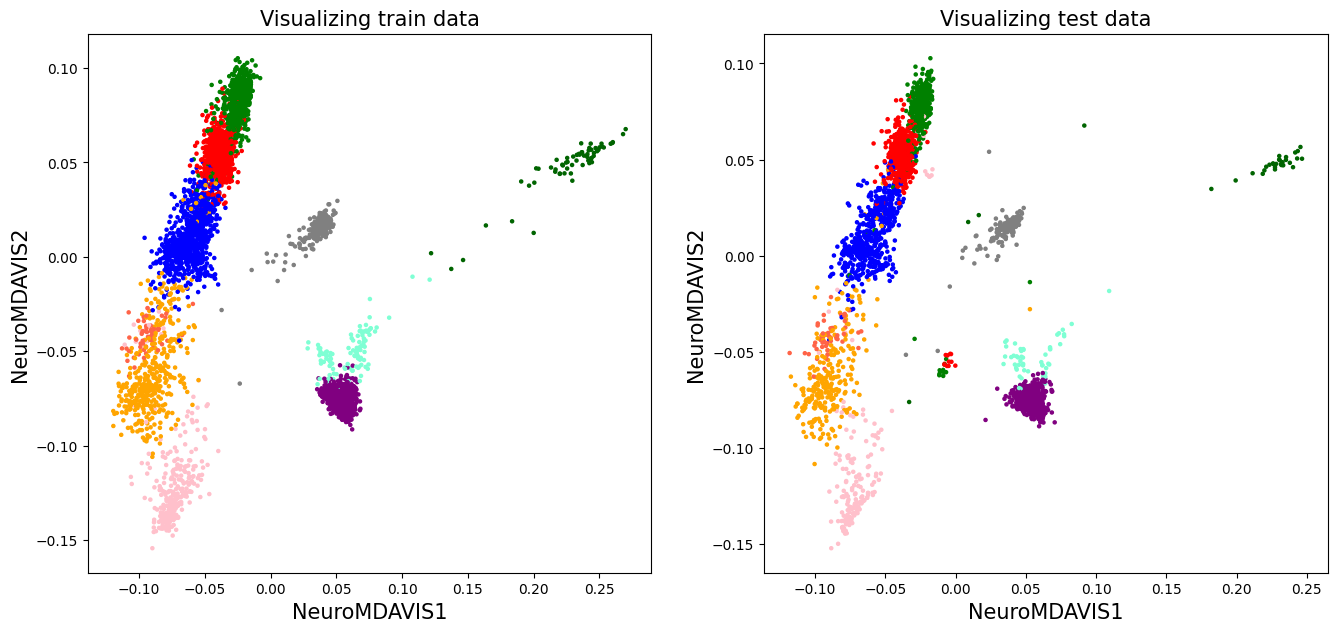

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(X_embedding_train[:,0],X_embedding_train[:,1],c=cs_train,s=5)
axs[0].set_xlabel("NeuroMDAVIS1", fontsize=15)
axs[0].set_ylabel("NeuroMDAVIS2", fontsize=15)
axs[0].set_title("Visualizing train data", fontsize=15)
axs[1].scatter(X_embedding_test[:,0],X_embedding_test[:,1],c=cs_test,s=5)
axs[1].set_xlabel("NeuroMDAVIS1", fontsize=15)
axs[1].set_ylabel("NeuroMDAVIS2", fontsize=15)
axs[1].set_title("Visualizing test data", fontsize=15)

In [8]:
# saving the train test labels
y_train.to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/pbmc10k_atacseq_train_labels.csv')
y_test.to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Train_test_embeddings/pbmc10k_atacseq_test_labels.csv')